# Basic Exploration & Manipulation

In [248]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
original = pd.read_csv('tips.csv')
df = original.copy()
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [249]:
# Viewing the data to understand it
print(df.head(10))
print()
print(df.tail(10))
print()
print(df.sample(10))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2

     total_bill   tip     sex smoker   day    time  size
234       15.53  3.00    Male    Yes   Sat  Dinner     2
235       10.07  1.25    Male     No   Sat  Dinner     2
236       12.60  1.00    Male    Yes   Sat  Dinner     2
237       32.83  1.17    Male    Yes   Sat  Dinner     2
238       35.83  4.67  Female     No   Sat  Dinner     3
239       29.03  5.92    Male     No   Sat  Dinner     3
240   

In [250]:
# Checking for any null values and seeing the data type for each column
print(df.isnull().sum())
print()
print(df.dtypes)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


In [251]:
# Seeing the unique values for each text column
print(df['sex'].unique(), df['smoker'].unique(),df['day'].unique(),df['time'].unique())

['Female' 'Male'] ['No' 'Yes'] ['Sun' 'Sat' 'Thur' 'Fri'] ['Dinner' 'Lunch']


In [252]:
# Finding duplicate rows
df[df.duplicated(keep = False) == True]

,total_bill,tip,sex,smoker,day,time,size
198,13.0,2.0,Female,Yes,Thur,Lunch,2
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [253]:
# Removing duplicate rows
df.drop_duplicates(inplace = True)
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


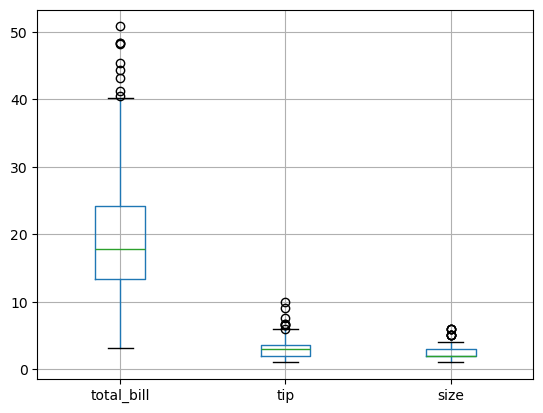

In [254]:
# Finding all outliers for the numerical columns
boxplot = df.boxplot(column=['total_bill', 'tip', 'size'])
plt.show()

In [255]:
# Since there are no lower outliers, only the upper outliers are removed
q1 = df['total_bill'].quantile(0.25)
q3 = df['total_bill'].quantile(0.75)
iqr = q3 - q1

outliers = df.loc[(df['total_bill'] > q3 + 1.5 * iqr)].index

df.drop(outliers, inplace = True)
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [256]:
q1 = df['tip'].quantile(0.25)
q3 = df['tip'].quantile(0.75)
iqr = q3 - q1

outliers = df.loc[(df['tip'] > q3 + 1.5 * iqr)].index

df.drop(outliers, inplace = True)
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [257]:
q1 = df['size'].quantile(0.25)
q3 = df['size'].quantile(0.75)
iqr = q3 - q1

outliers = df.loc[(df['size'] > q3 + 1.5 * iqr)].index

df.drop(outliers, inplace = True)
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [258]:
# Resetting the indexes
df.reset_index(inplace = True, drop = True)
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
216,35.83,4.67,Female,No,Sat,Dinner,3
217,27.18,2.00,Female,Yes,Sat,Dinner,2
218,22.67,2.00,Male,Yes,Sat,Dinner,2
219,17.82,1.75,Male,No,Sat,Dinner,2


In [259]:
# Adding a tip percentage column
tip_percentage = ((df['tip']/df['total_bill']) * 100).round(2)
df['tip_percentage'] = tip_percentage
df

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68
...,...,...,...,...,...,...,...,...
216,35.83,4.67,Female,No,Sat,Dinner,3,13.03
217,27.18,2.00,Female,Yes,Sat,Dinner,2,7.36
218,22.67,2.00,Male,Yes,Sat,Dinner,2,8.82
219,17.82,1.75,Male,No,Sat,Dinner,2,9.82


In [260]:
# Re-arranging the columns
columns = df.columns.tolist()
columns

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_percentage']

In [261]:
columns = columns[:2] + columns[-1:] + columns[2:7]
columns

['total_bill', 'tip', 'tip_percentage', 'sex', 'smoker', 'day', 'time', 'size']

In [262]:
df = df[columns]
df

,total_bill,tip,tip_percentage,sex,smoker,day,time,size
0,16.99,1.01,5.94,Female,No,Sun,Dinner,2
1,10.34,1.66,16.05,Male,No,Sun,Dinner,3
2,21.01,3.50,16.66,Male,No,Sun,Dinner,3
3,23.68,3.31,13.98,Male,No,Sun,Dinner,2
4,24.59,3.61,14.68,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
216,35.83,4.67,13.03,Female,No,Sat,Dinner,3
217,27.18,2.00,7.36,Female,Yes,Sat,Dinner,2
218,22.67,2.00,8.82,Male,Yes,Sat,Dinner,2
219,17.82,1.75,9.82,Male,No,Sat,Dinner,2


# Q1: What is the average tip, bill amount, and size?

In [263]:
# Viewing basic statistics for all columns
df.describe(include = 'all')

,total_bill,tip,tip_percentage,sex,smoker,day,time,size
count,221.000000,221.000000,221.000000,221,221,221,221,221.000000
unique,NaN,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,NaN,141,138,79,160,NaN
mean,18.223937,2.762262,16.096425,NaN,NaN,NaN,NaN,2.411765
std,7.136796,1.045498,6.113924,NaN,NaN,NaN,NaN,0.749331
min,3.070000,1.000000,3.560000,NaN,NaN,NaN,NaN,1.000000
25%,13.030000,2.000000,13.030000,NaN,NaN,NaN,NaN,2.000000
50%,16.970000,2.610000,15.430000,NaN,NaN,NaN,NaN,2.000000
75%,22.120000,3.480000,18.840000,NaN,NaN,NaN,NaN,3.000000


# Q2: What can the historical data tell us about how the total bill amount is affected by the other columns? 

## Customer Gender & Total Bill Amt

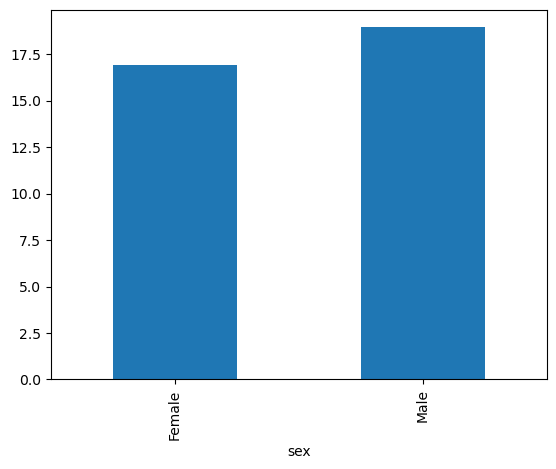

In [264]:
grouped_df = df.groupby('sex')['total_bill'].mean()
grouped_df.plot(kind = 'bar')
plt.show()

On average, the men spend more by $2 or so.

## Smoker & Total Bill Amt

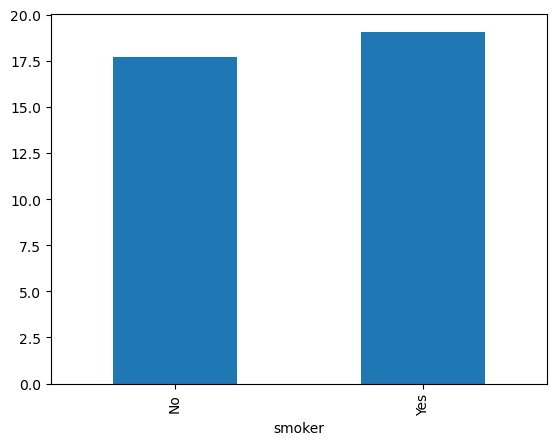

In [265]:
grouped_df2 = df.groupby('smoker')['total_bill'].mean()
grouped_df2.plot(kind = 'bar')
plt.show()

Those who smoke spend about $1.5 more than those who don't smoke.

## Day & Total Bill Amt

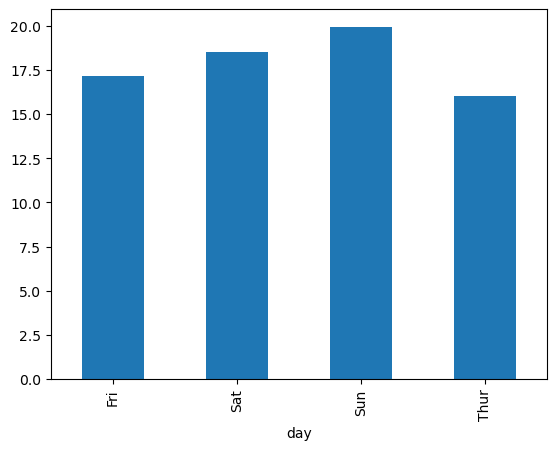

In [266]:
grouped_df3 = df.groupby('day')['total_bill'].mean()
grouped_df3.plot(kind = 'bar')
plt.show()

## Time & Total Bill Amt

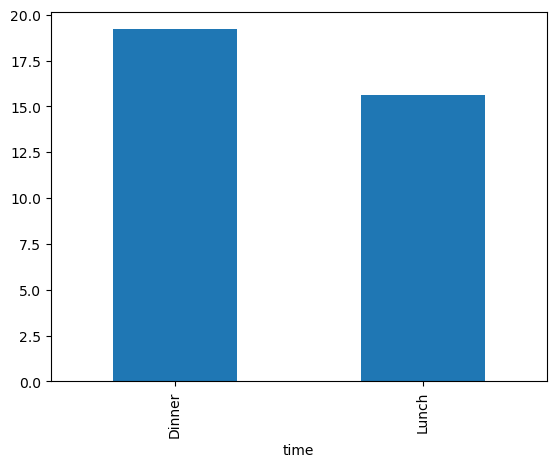

In [267]:
grouped_df4 = df.groupby('time')['total_bill'].mean()
grouped_df4.plot(kind = 'bar')
plt.show()

## Group Size & Total Bill Amt

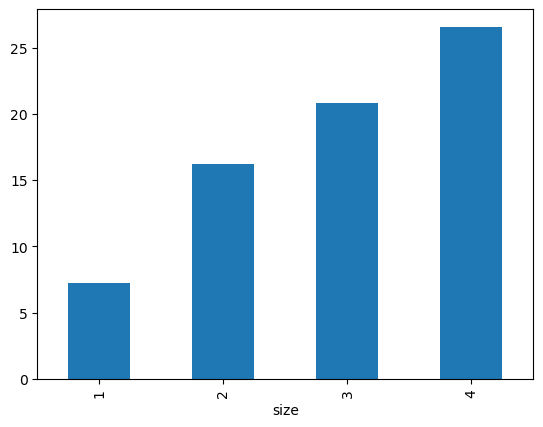

In [268]:
grouped_df5 = df.groupby('size')['total_bill'].mean()
grouped_df5.plot(kind = 'bar')
plt.show()

As expected, more money is being spent the higher the party size is.

# Q3: What can the historical data tell us about how the tip amount is affected by the other columns? 

## Group Size & Tip Amt

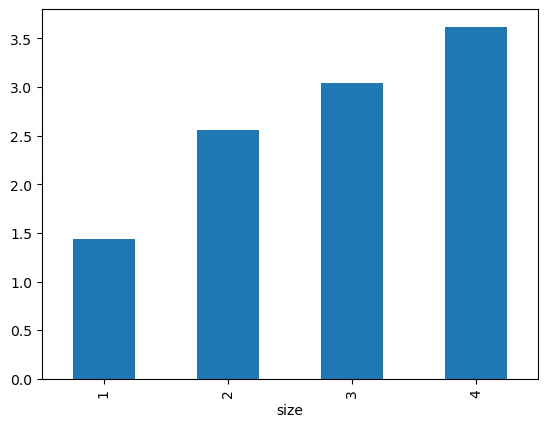

In [269]:
grouped_df6 = df.groupby('size')['tip'].mean()
grouped_df6.plot(kind = 'bar')
plt.show()

As expected, the higher the party size, the more tips the workers receive.

## Time & Tip Amt

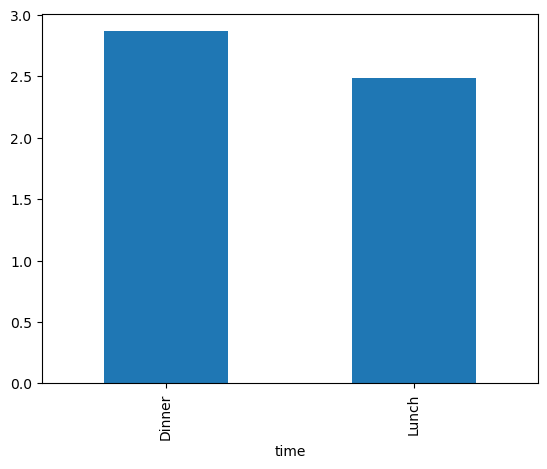

In [270]:
grouped_df7 = df.groupby('time')['tip'].mean()
grouped_df7.plot(kind = 'bar')
plt.show()

Since the total bill amount is higher during dinner time, it follows that the tip amount is also higher than the tips earned by the workers during lunch time.

## Day & Tip Amt

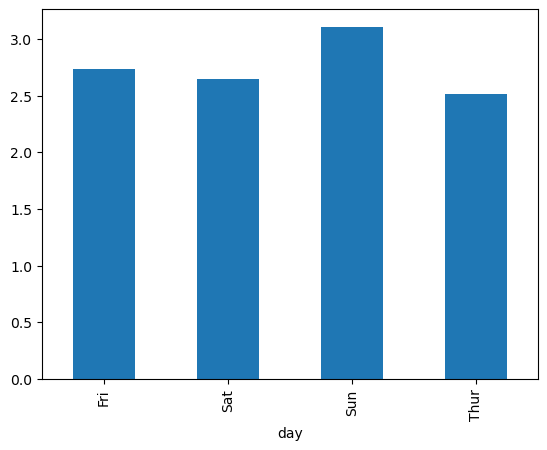

In [271]:
grouped_df8 = df.groupby('day')['tip'].mean()
grouped_df8.plot(kind = 'bar')
plt.show()

Sunday's results in the workers receiving more tips followed by Friday, Saturday, and then Thursday.

## Smoker & Tip Amt

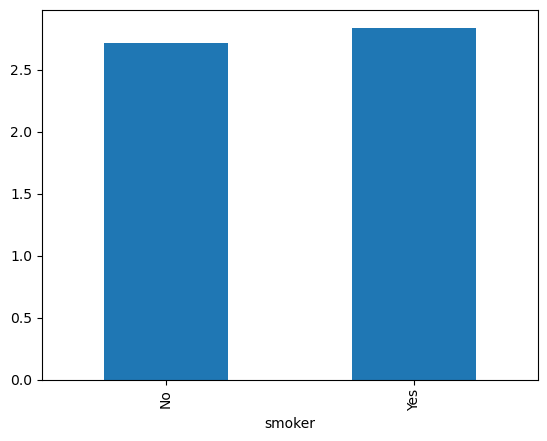

In [272]:
grouped_df9 = df.groupby('smoker')['tip'].mean()
grouped_df9.plot(kind = 'bar')
plt.show()

Those who smoke tend to give a higher tip than those who don't but by only a small amount (nothing higher than $0.5)

## Customer Gender & Tip Amt

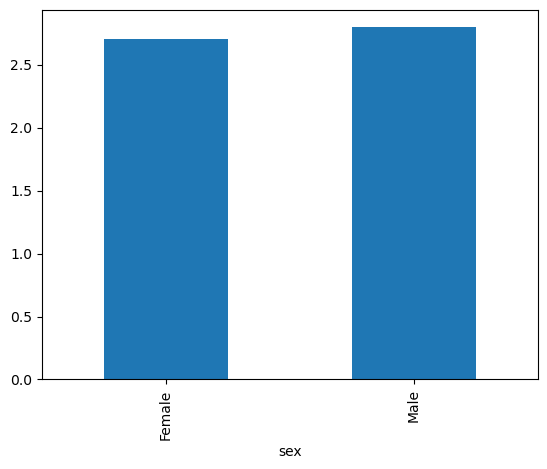

In [273]:
grouped_df10 = df.groupby('sex')['tip'].mean()
grouped_df10.plot(kind = 'bar')
plt.show()

Male customers tend to give a higher tip than the female counterparts but by only a small amount.

# Q4: How do the sizes differ by day or time?

## Day & Size

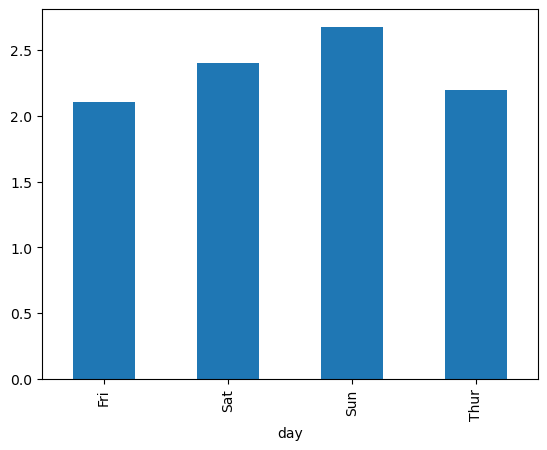

In [274]:
grouped_df11 = df.groupby('day')['size'].mean()
grouped_df11.plot(kind = 'bar')
plt.show()

## Day, Time, & Size

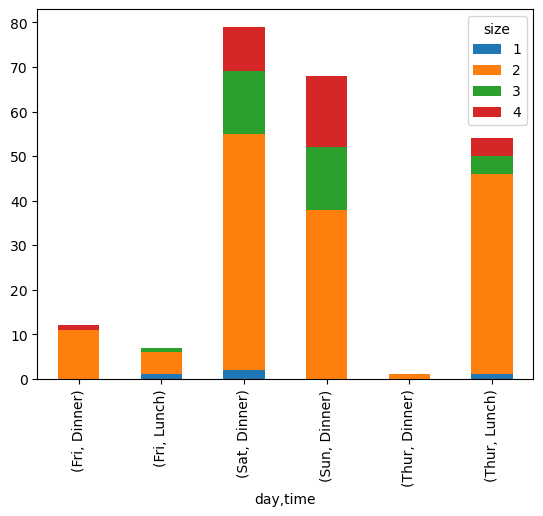

In [275]:
df.groupby(['day', 'time', 'size']).size().unstack(fill_value = 0).plot(kind = 'bar', stacked = True)
plt.show()

# Q5: What is more popular (dinner or lunch) for each day?

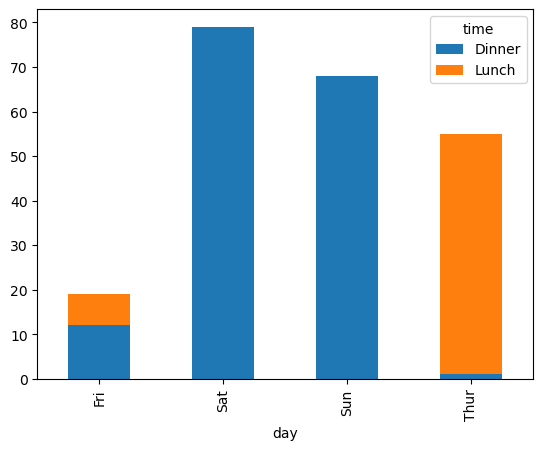

In [276]:
df.groupby(['day', 'time']).size().unstack(fill_value=0).plot(kind = 'bar', stacked = True)
plt.show()

# Q6: What is the distribution for the total bill amount and the tips that the workers recieve?

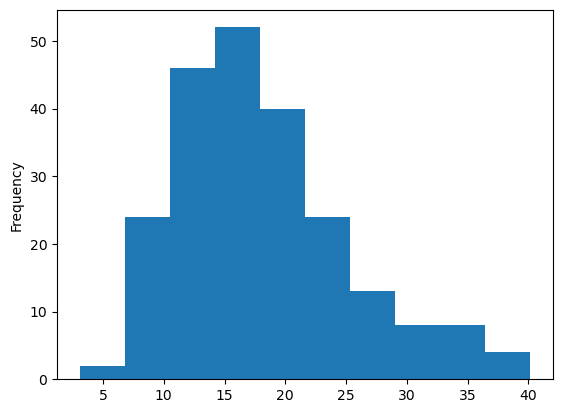

In [277]:
df['total_bill'].plot(kind = 'hist')
plt.show()

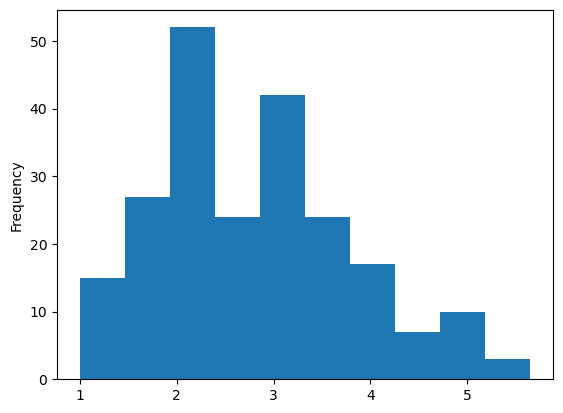

In [278]:
df['tip'].plot(kind = 'hist')
plt.show()

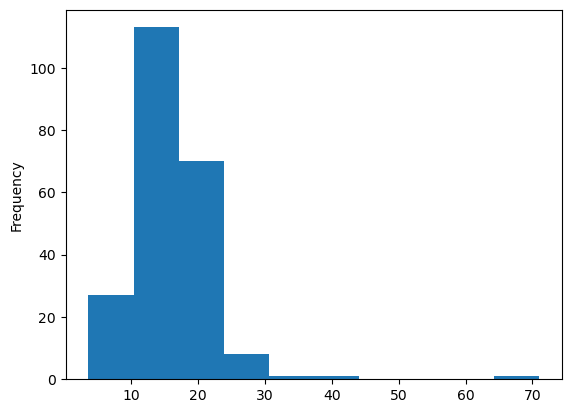

In [279]:
df['tip_percentage'].plot(kind = 'hist')
plt.show()

# Q7: Build a model that can predict how much the total bill amount will change based on the existing factors (gender, smoker, day, etc.)

In this section, I will build a regression model (Linear, Polynomial, and a Decision Tree) to then predict the total bill column value based on all of the other columns, excluding the tip column.

## Finding the best ML model

In [335]:
# Making adjustments to the df
df2 = df.copy()
df2.drop(['tip', 'tip_percentage'], axis = 1, inplace = True)
df2

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...
216,35.83,Female,No,Sat,Dinner,3
217,27.18,Female,Yes,Sat,Dinner,2
218,22.67,Male,Yes,Sat,Dinner,2
219,17.82,Male,No,Sat,Dinner,2


In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Numerating the categorical columns such as sex and day
categorical_columns = ['sex', 'smoker', 'day', 'time']
encoder = OneHotEncoder(drop = 'first', sparse=False)
encoded_features = encoder.fit_transform(df2[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Standardizing the size column since its values are not binary but a range from 1-4
scaler = StandardScaler()
size_scaled = scaler.fit_transform(df2[['size']])
size_scaled_df = pd.DataFrame(size_scaled, columns=['size'])

# Getting the final dataframe for ML usage
total_bill_ML = pd.concat([df2['total_bill'],size_scaled_df, encoded_df], axis = 1)
total_bill_ML

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,total_bill,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,-0.550757,0.0,0.0,0.0,1.0,0.0,0.0
1,10.34,0.786796,1.0,0.0,0.0,1.0,0.0,0.0
2,21.01,0.786796,1.0,0.0,0.0,1.0,0.0,0.0
3,23.68,-0.550757,1.0,0.0,0.0,1.0,0.0,0.0
4,24.59,2.124349,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
216,35.83,0.786796,0.0,0.0,1.0,0.0,0.0,0.0
217,27.18,-0.550757,0.0,1.0,1.0,0.0,0.0,0.0
218,22.67,-0.550757,1.0,1.0,1.0,0.0,0.0,0.0
219,17.82,-0.550757,1.0,0.0,1.0,0.0,0.0,0.0


In [363]:
# Seperating the independent and dependent variables
X = total_bill_ML.loc[:, 'size': 'time_Lunch']
y = total_bill_ML['total_bill']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Creating a linear regression class and training it
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Testing the ML model
y_pred = regressor.predict(X_test)
y_pred

array([13.73045243, 14.53846668, 13.73045243, 18.4174221 , 17.16666032,
       26.33068782, 16.14238295, 14.47317565, 12.8152311 , 16.14238295,
       14.23849098, 20.07536664, 26.33068782, 19.57859084, 14.47317565,
       14.53846668, 19.57859084, 14.03042813, 19.57859084, 20.26309074,
       16.14238295, 13.73045243, 19.33264342, 24.42679585, 14.23849098,
       16.14238295, 26.33068782, 17.90938354, 13.73045243, 21.23653538,
       14.47317565, 26.33068782, 20.26309074, 17.90938354, 20.72849682,
       16.14238295, 16.14238295, 26.33068782, 14.23849098, 19.57859084,
       20.26309074, 16.14238295, 16.82688285, 17.90938354, 14.03042813])

In [338]:
# Using various metrics to see how well the model performed (to then compare to the other models)
linearReg_mse = mean_squared_error(y_test, y_pred)
linearReg_rmse = np.sqrt(linearReg_mse)
linearReg_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {linearReg_mse}")
print(f"Root Mean Squared Error (RMSE): {linearReg_rmse}")
print(f"R-squared (R2): {linearReg_r2}")


Mean Squared Error (MSE): 25.781928549892843
Root Mean Squared Error (RMSE): 5.077590821432231
R-squared (R2): 0.2987054710508461


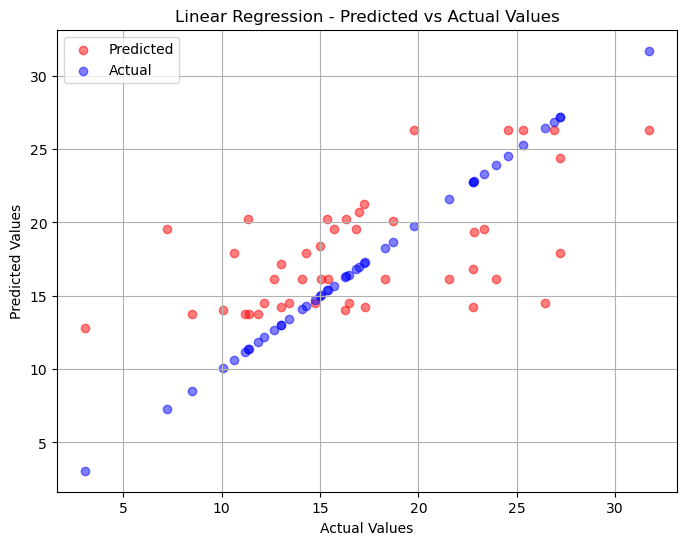

In [339]:
# Scatter plot with different colors for actual and predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red', label='Predicted', alpha=0.5)  # Predicted values in red
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)  # Actual values in blue
plt.title('Linear Regression - Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()  # Show legend to differentiate between actual and predicted
plt.grid(True)
plt.show()

In [322]:
# Building a polynomial regression model to see if they will perform better
for i in range(1, 11):
    poly = PolynomialFeatures(degree=i) 
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred2 = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred2)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred2)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2): {r2}")
    print()

Mean Squared Error (MSE): 25.78192854989282
Root Mean Squared Error (RMSE): 5.07759082143223
R-squared (R2): 0.29870547105084666

Mean Squared Error (MSE): 1.1399929479740747e+22
Root Mean Squared Error (RMSE): 106770452278.43117
R-squared (R2): -3.1008961021194004e+20

Mean Squared Error (MSE): 42.013541443822575
Root Mean Squared Error (RMSE): 6.48178535928355
R-squared (R2): -0.14281081414500196

Mean Squared Error (MSE): 1.138280859398603e+25
Root Mean Squared Error (RMSE): 3373841815199.1104
R-squared (R2): -3.096239048056392e+23

Mean Squared Error (MSE): 7.032888189547285e+26
Root Mean Squared Error (RMSE): 26519593114426.332
R-squared (R2): -1.913016708775702e+25

Mean Squared Error (MSE): 4.877611132759597e+24
Root Mean Squared Error (RMSE): 2208531442556.2515
R-squared (R2): -1.3267595537417652e+23

Mean Squared Error (MSE): 3.3676373195605985e+26
Root Mean Squared Error (RMSE): 18351123452150.277
R-squared (R2): -9.160314066973307e+24

Mean Squared Error (MSE): 3.88232872714

A degree of 1 has the best results, therefore, we will save the MSE, RMSE, and R2 for that degree only (to compare later).

In [340]:
poly = PolynomialFeatures(degree=1) 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred2 = model.predict(X_test_poly)

Poly_linearReg_mse = mean_squared_error(y_test, y_pred2)
Poly_linearReg_rmse = np.sqrt(Poly_linearReg_mse)
Poly_linearReg_r2 = r2_score(y_test, y_pred2)

print(f"Mean Squared Error (MSE): {Poly_linearReg_mse}")
print(f"Root Mean Squared Error (RMSE): {Poly_linearReg_rmse}")
print(f"R-squared (R2): {Poly_linearReg_r2}")
print()

Mean Squared Error (MSE): 25.78192854989282
Root Mean Squared Error (RMSE): 5.07759082143223
R-squared (R2): 0.29870547105084666



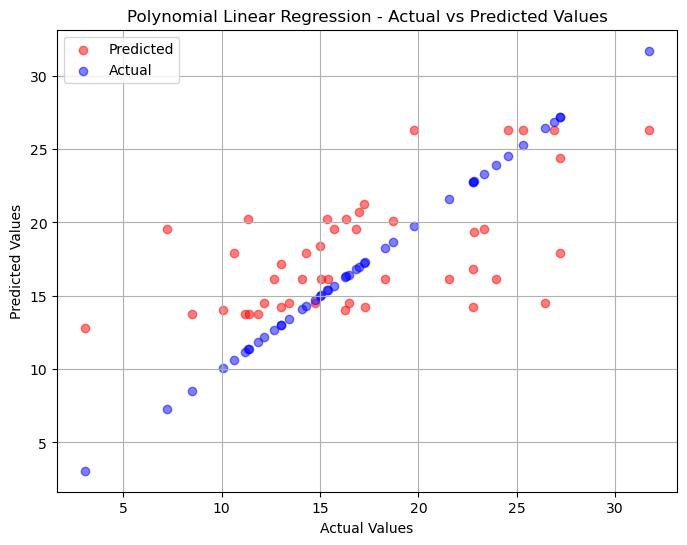

In [341]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred2, color='red', label='Predicted', alpha=0.5)  # Predicted values in red
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)  # Actual values in blue
plt.title('Polynomial Linear Regression - Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()  # Show legend to differentiate between actual and predicted
plt.grid(True)
plt.show()


Mean Squared Error (MSE): 36.59584834668367
Root Mean Squared Error (RMSE): 6.049450251608295
R-squared (R2): 0.004555916826909923


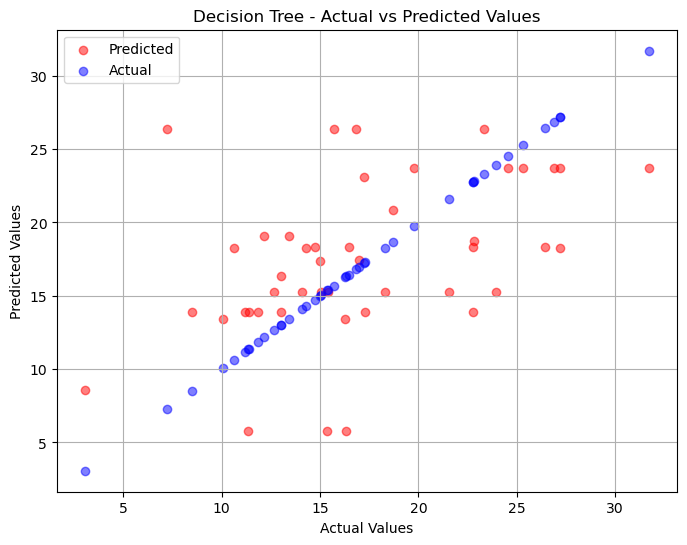

In [342]:
from sklearn.tree import DecisionTreeRegressor

# Training the model
regressor2 = DecisionTreeRegressor(random_state=0)
regressor2.fit(X_train, y_train)

# Testing the model
y_pred3 = regressor2.predict(X_test)

decisionTree_mse = mean_squared_error(y_test, y_pred3)
decisionTree_rmse = np.sqrt(decisionTree_mse)
decisionTree_r2 = r2_score(y_test, y_pred3)

print("Mean Squared Error (MSE):", decisionTree_mse)
print("Root Mean Squared Error (RMSE):", decisionTree_rmse)
print("R-squared (R2):", decisionTree_r2)

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred3, color='red', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)
plt.title('Decision Tree - Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [343]:
print(format('Linear Regression', '>30s') + format('Polynomial Linear Regression (1st Degree)', '>50s') + format("Decision Tree", '>25s'))
print('-'*113)
print(format("MSE:", '<20s') + format(linearReg_mse, '<20.2f') + format(Poly_linearReg_mse,'<50.2f') + format(decisionTree_mse, '<20.2f'))
print(format("RMSE:", '<20s') + format(linearReg_rmse, '<20.2f') + format(Poly_linearReg_rmse,'<50.2f') + format(decisionTree_rmse, '<20.2f'))
print(format("R2 Score:", '<20s') + format(linearReg_r2, '<20.2f') + format(Poly_linearReg_r2,'<50.2f') + format(decisionTree_r2, '<20.2f'))

             Linear Regression         Polynomial Linear Regression (1st Degree)            Decision Tree
-----------------------------------------------------------------------------------------------------------------
MSE:                25.78               25.78                                             36.60               
RMSE:               5.08                5.08                                              6.05                
R2 Score:           0.30                0.30                                              0.00                


The decision tree model has the worst outcome while the Linear Regression and Polynomial Linear Regression have essentially the same values (since the polynomial degree is 1). Since the linear regression model came first, I will use that model to find the coefficients for each variable.

## Insights based on ML model

In [344]:
# Getting the coefficients and intercept
coefficients = regressor.coef_
intercept = regressor.intercept_
print(coefficients)
print(intercept)
# size	sex_Male	smoker_Yes	day_Sat	day_Sun	day_Thur	time_Lunch

[ 3.80856162  0.50803856  3.43620789 -2.35370721 -1.19253847  3.13623219
 -6.23266262]
18.924475033377835


# Q8: Build a model that can predict how much the tip amount will change based on the existing factors (gender, smoker, day, etc.)

## Finding the best model (same method used for the total bill ML model)

In [350]:
# Making adjustments to the df
df3 = df.copy()
df3.drop(['tip_percentage'], axis = 1, inplace = True)
df3

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
216,35.83,4.67,Female,No,Sat,Dinner,3
217,27.18,2.00,Female,Yes,Sat,Dinner,2
218,22.67,2.00,Male,Yes,Sat,Dinner,2
219,17.82,1.75,Male,No,Sat,Dinner,2


In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Numerating the categorical columns such as sex and day
categorical_columns = ['sex', 'smoker', 'day', 'time']
encoder = OneHotEncoder(drop = 'first', sparse=False)
encoded_features = encoder.fit_transform(df3[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Standardizing the size and total bill column since its values are not binary but a range
scaler = StandardScaler()
size_scaled = scaler.fit_transform(df3[['size', 'total_bill']])
size_scaled_df = pd.DataFrame(size_scaled, columns=['size', 'total_bill'])

# Getting the final dataframe for ML usage
tip_ML = pd.concat([df3['tip'],size_scaled_df, encoded_df], axis = 1)
tip_ML

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,tip,size,total_bill,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,1.01,-0.550757,-0.173290,0.0,0.0,0.0,1.0,0.0,0.0
1,1.66,0.786796,-1.107196,1.0,0.0,0.0,1.0,0.0,0.0
2,3.50,0.786796,0.391266,1.0,0.0,0.0,1.0,0.0,0.0
3,3.31,-0.550757,0.766233,1.0,0.0,0.0,1.0,0.0,0.0
4,3.61,2.124349,0.894031,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
216,4.67,0.786796,2.472543,0.0,0.0,1.0,0.0,0.0,0.0
217,2.00,-0.550757,1.257763,0.0,1.0,1.0,0.0,0.0,0.0
218,2.00,-0.550757,0.624392,1.0,1.0,1.0,0.0,0.0,0.0
219,1.75,-0.550757,-0.056728,1.0,0.0,1.0,0.0,0.0,0.0


In [365]:
# Seperating the independent and dependent variables
X = tip_ML.loc[:, 'size': 'time_Lunch']
y = tip_ML['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Creating a linear regression class and training it
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Testing the ML model
y_pred = regressor.predict(X_test)
y_pred

array([1.99237691, 2.55667421, 2.28840835, 2.2401369 , 2.29079888,
       3.16682294, 2.82708025, 2.4453109 , 1.21616972, 2.54074031,
       2.25793405, 2.76620341, 3.6531603 , 3.17395974, 2.5968508 ,
       2.44566242, 2.60039883, 2.94044793, 2.50084064, 2.47930514,
       3.32575225, 2.22673513, 3.22515198, 3.71572405, 2.63325962,
       2.57422006, 4.2187918 , 1.9869144 , 2.24523709, 2.84100646,
       3.47437256, 3.5879629 , 2.39648683, 3.44504544, 2.94813175,
       3.11694436, 2.33105138, 3.79324661, 3.11519175, 1.75723786,
       2.04142531, 2.45527886, 3.14298535, 2.31113931, 2.39596154])

In [353]:
# Using various metrics to see how well the model performed (to then compare to the other models)
linearReg_mse = mean_squared_error(y_test, y_pred)
linearReg_rmse = np.sqrt(linearReg_mse)
linearReg_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {linearReg_mse}")
print(f"Root Mean Squared Error (RMSE): {linearReg_rmse}")
print(f"R-squared (R2): {linearReg_r2}")

Mean Squared Error (MSE): 1.0328170309201874
Root Mean Squared Error (RMSE): 1.0162760603891974
R-squared (R2): 0.09636345773585919


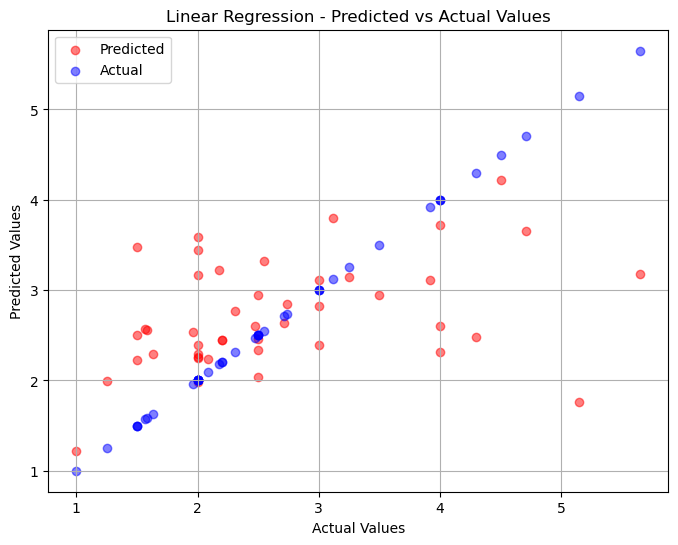

In [354]:
# Scatter plot with different colors for actual and predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red', label='Predicted', alpha=0.5)  # Predicted values in red
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)  # Actual values in blue
plt.title('Linear Regression - Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()  # Show legend to differentiate between actual and predicted
plt.grid(True)
plt.show()

In [355]:
# Building a polynomial regression model to see if they will perform better
for i in range(1, 11):
    poly = PolynomialFeatures(degree=i) 
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred2 = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred2)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred2)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2): {r2}")
    print()

Mean Squared Error (MSE): 1.0328170309201876
Root Mean Squared Error (RMSE): 1.0162760603891974
R-squared (R2): 0.09636345773585908

Mean Squared Error (MSE): 1.1914903721778078
Root Mean Squared Error (RMSE): 1.0915541086807414
R-squared (R2): -0.04246367732385914

Mean Squared Error (MSE): 3.362575187805786e+22
Root Mean Squared Error (RMSE): 183373258350.44177
R-squared (R2): -2.9419981708713934e+22

Mean Squared Error (MSE): 11.029575113428258
Root Mean Squared Error (RMSE): 3.321080413574513
R-squared (R2): -8.650041410782201

Mean Squared Error (MSE): 98.98520399476237
Root Mean Squared Error (RMSE): 9.949130816044303
R-squared (R2): -85.60454349154689

Mean Squared Error (MSE): 1.1096839037742243e+24
Root Mean Squared Error (RMSE): 1053415351973.8662
R-squared (R2): -9.708892241245418e+23

Mean Squared Error (MSE): 925021.4091565061
Root Mean Squared Error (RMSE): 961.7803331096483
R-squared (R2): -809322.5516708695

Mean Squared Error (MSE): 3387827.680480814
Root Mean Squared 

Same as the total bill ML model, the model polynomial regression model performs the best in the 1st degree

In [357]:
poly = PolynomialFeatures(degree=1) 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred2 = model.predict(X_test_poly)

Poly_linearReg_mse = mean_squared_error(y_test, y_pred2)
Poly_linearReg_rmse = np.sqrt(Poly_linearReg_mse)
Poly_linearReg_r2 = r2_score(y_test, y_pred2)

print(f"Mean Squared Error (MSE): {Poly_linearReg_mse}")
print(f"Root Mean Squared Error (RMSE): {Poly_linearReg_rmse}")
print(f"R-squared (R2): {Poly_linearReg_r2}")
print()

Mean Squared Error (MSE): 1.0328170309201876
Root Mean Squared Error (RMSE): 1.0162760603891974
R-squared (R2): 0.09636345773585908



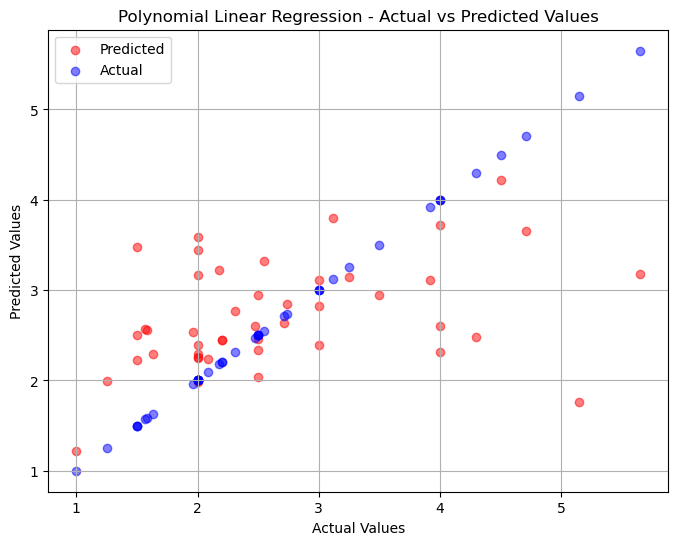

In [358]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred2, color='red', label='Predicted', alpha=0.5)  # Predicted values in red
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)  # Actual values in blue
plt.title('Polynomial Linear Regression - Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()  # Show legend to differentiate between actual and predicted
plt.grid(True)
plt.show()

Mean Squared Error (MSE): 1.76374
Root Mean Squared Error (RMSE): 1.3280587336409486
R-squared (R2): -0.5431386851095774


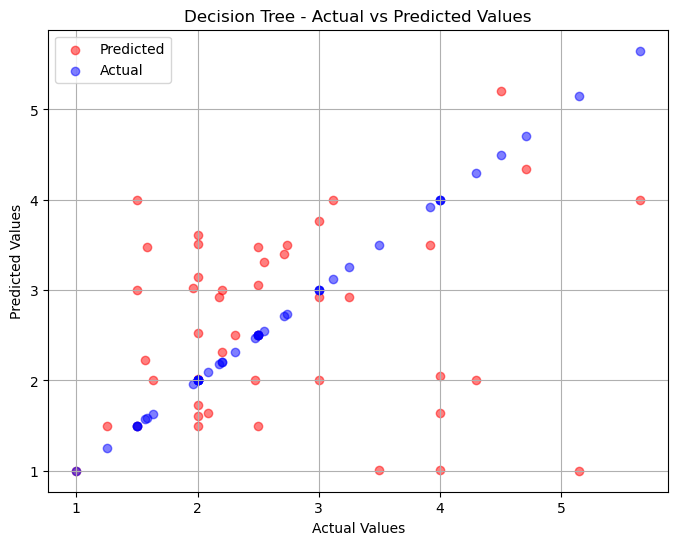

In [359]:
from sklearn.tree import DecisionTreeRegressor

# Training the model
regressor2 = DecisionTreeRegressor(random_state=0)
regressor2.fit(X_train, y_train)

# Testing the model
y_pred3 = regressor2.predict(X_test)

decisionTree_mse = mean_squared_error(y_test, y_pred3)
decisionTree_rmse = np.sqrt(decisionTree_mse)
decisionTree_r2 = r2_score(y_test, y_pred3)

print("Mean Squared Error (MSE):", decisionTree_mse)
print("Root Mean Squared Error (RMSE):", decisionTree_rmse)
print("R-squared (R2):", decisionTree_r2)

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred3, color='red', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)
plt.title('Decision Tree - Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [360]:
print(format('Linear Regression', '>30s') + format('Polynomial Linear Regression (1st Degree)', '>50s') + format("Decision Tree", '>25s'))
print('-'*113)
print(format("MSE:", '<20s') + format(linearReg_mse, '<20.2f') + format(Poly_linearReg_mse,'<50.2f') + format(decisionTree_mse, '<20.2f'))
print(format("RMSE:", '<20s') + format(linearReg_rmse, '<20.2f') + format(Poly_linearReg_rmse,'<50.2f') + format(decisionTree_rmse, '<20.2f'))
print(format("R2 Score:", '<20s') + format(linearReg_r2, '<20.2f') + format(Poly_linearReg_r2,'<50.2f') + format(decisionTree_r2, '<20.2f'))

             Linear Regression         Polynomial Linear Regression (1st Degree)            Decision Tree
-----------------------------------------------------------------------------------------------------------------
MSE:                1.03                1.03                                              1.76                
RMSE:               1.02                1.02                                              1.33                
R2 Score:           0.10                0.10                                              -0.54               


Just like the total bill ML model, I will use the linear regression model to perform some analysis since it and the polynomial linear regression are essentially the same.

## Insights based on ML model

In [361]:
# Getting the coefficients and intercept
coefficients = regressor.coef_
intercept = regressor.intercept_
print(coefficients)
print(intercept)
# size	total_bill	sex_Male	smoker_Yes	day_Sat	 day_Sun	day_Thur	time_Lunch

[ 0.0782578   0.62736028 -0.13267563 -0.09716766  0.0089244   0.20971702
 -0.36154703  0.46554802]
2.787319407823601
